## START OF CODING

In [33]:
import pandas as pd
import numpy as np
import missingno as msng

In [34]:
df_ = pd.read_excel('Total S&P Returns in USD - Until 2021-11-09.xlsx', header=None)

### General Code Structure:
#### 1. Transform current nominal values into percentage-based values and create a new dataframe
#### 2. Iterate through the new S&P-500 percentage-based dataframe and calculate the cumulative performance given a 6-month time period
#### 3. Check for each stock whether they were in the S&P in a given start period
#### 4. Shorten the list to only include the top 25-stocks in an equally weighted portfolio
#### 5. Calculate the average of the stocks in the successive 6-months period 
#### 6. Repeat the process from the initial year of 1992 until 2021.


### Transpose the table for better view

In [35]:
df = df_.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,Name,Code,CURRENCY,2022-02-09 00:00:00,2022-01-09 00:00:00,2021-12-09 00:00:00,2021-11-09 00:00:00,2021-10-09 00:00:00,2021-09-09 00:00:00,2021-08-09 00:00:00,...,1992-11-09 00:00:00,1992-10-09 00:00:00,1992-09-09 00:00:00,1992-08-09 00:00:00,1992-07-09 00:00:00,1992-06-09 00:00:00,1992-05-09 00:00:00,1992-04-09 00:00:00,1992-03-09 00:00:00,1992-02-09 00:00:00
1,S&P 500 COMPOSITE - PRICE INDEX,<.SPX>,U$,4587.18,4677.03,4667.45,4685.25,4391.34,4493.28,4432.35,...,418.59,402.66,416.36,418.88,NaN,NaN,NaN,NaN,NaN,NaN
2,ACTIVISION BLIZZARD,<ATVI.O>,U$,81.5,64.04,59.07,67.1,77.61,78.05,81.41,...,NaN,NaN,NaN,NaN,6.2839,6.6114,6.6114,5.3011,6.4923,6.4923
3,HALLIBURTON,<HAL>,U$,32.65,26.02,23.49,25.08,23.94,19.32,19.69,...,7.2964,7.2964,8.309,7.8623,NaN,NaN,NaN,NaN,NaN,NaN
4,LAS VEGAS SANDS,<LVS>,U$,46.71,37.9,38.11,41.08,38.22,43.67,40.64,...,NaN,NaN,NaN,NaN,9.3526,10.4317,9.8322,8.873,8.9929,9.4125


### Using Missigno to have a more detailed look at the data
Rows correspond to the stocks, columns to the amount of data points within the system

<AxesSubplot:>

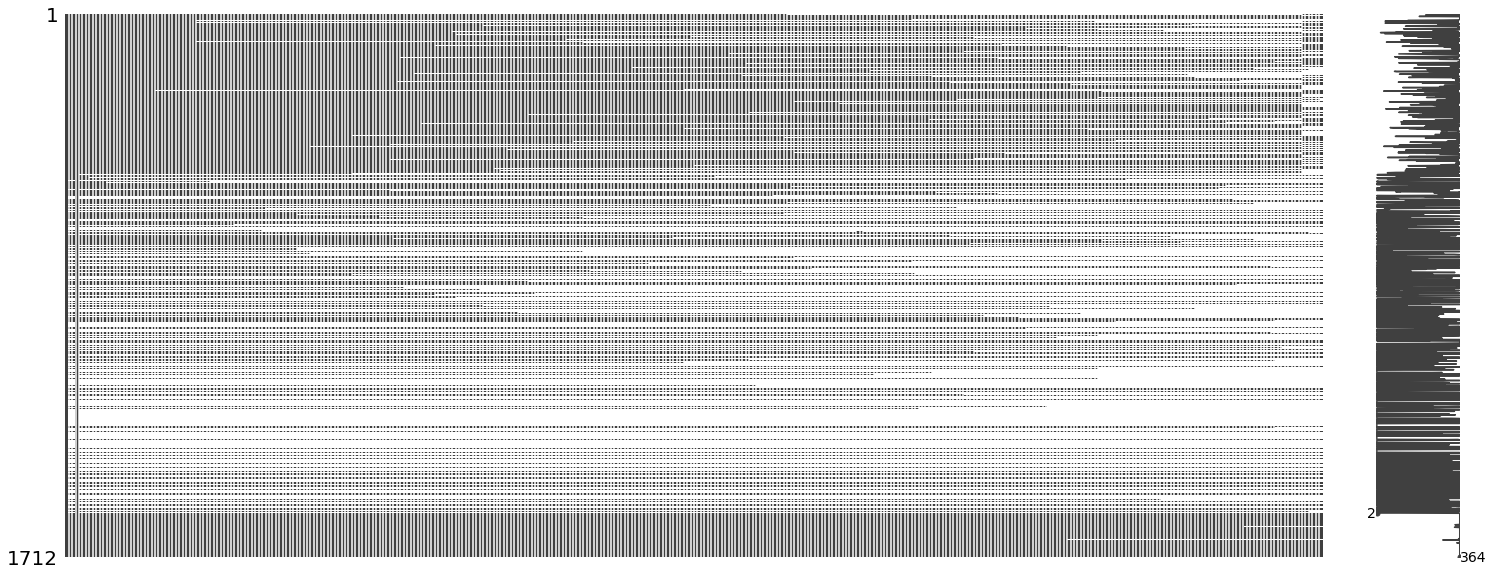

In [36]:
msng.matrix(df)

#### Using Numpy to facilitate data manipulation use 

In [37]:
np_df = df.to_numpy() 
print(np_df)

[['Name' 'Code' 'CURRENCY' ... datetime.datetime(1992, 4, 9, 0, 0)
  datetime.datetime(1992, 3, 9, 0, 0) datetime.datetime(1992, 2, 9, 0, 0)]
 ['S&P 500 COMPOSITE - PRICE INDEX' '<.SPX>' 'U$' ... nan nan nan]
 ['ACTIVISION BLIZZARD' '<ATVI.O>' 'U$' ... 5.3011 6.4923 6.4923]
 ...
 ['WHIRLPOOL' '<WHR.N>' 'U$' ... 43.875 43.5 40.5]
 ['WILLIAMS' '<WMB.N>' 'U$' ... 4.2374 4.3781 4.7534]
 ['XCEL ENERGY' '<XEL.OQ>' 'U$' ... 19.5625 20.375 20.125]]


In [38]:
print(np_df)
print(type(np_df))
print(len(np_df))

[['Name' 'Code' 'CURRENCY' ... datetime.datetime(1992, 4, 9, 0, 0)
  datetime.datetime(1992, 3, 9, 0, 0) datetime.datetime(1992, 2, 9, 0, 0)]
 ['S&P 500 COMPOSITE - PRICE INDEX' '<.SPX>' 'U$' ... nan nan nan]
 ['ACTIVISION BLIZZARD' '<ATVI.O>' 'U$' ... 5.3011 6.4923 6.4923]
 ...
 ['WHIRLPOOL' '<WHR.N>' 'U$' ... 43.875 43.5 40.5]
 ['WILLIAMS' '<WMB.N>' 'U$' ... 4.2374 4.3781 4.7534]
 ['XCEL ENERGY' '<XEL.OQ>' 'U$' ... 19.5625 20.375 20.125]]
<class 'numpy.ndarray'>
1712


In [39]:
view = np_df[1:]
view

array([['S&P 500 COMPOSITE - PRICE INDEX', '<.SPX>', 'U$', ..., nan, nan,
        nan],
       ['ACTIVISION BLIZZARD', '<ATVI.O>', 'U$', ..., 5.3011, 6.4923,
        6.4923],
       ['HALLIBURTON', '<HAL>', 'U$', ..., nan, nan, nan],
       ...,
       ['WHIRLPOOL', '<WHR.N>', 'U$', ..., 43.875, 43.5, 40.5],
       ['WILLIAMS', '<WMB.N>', 'U$', ..., 4.2374, 4.3781, 4.7534],
       ['XCEL ENERGY', '<XEL.OQ>', 'U$', ..., 19.5625, 20.375, 20.125]],
      dtype=object)

### Creating numpy-Dataframe with percentage changes

In [40]:
np_df[:]

array([['Name', 'Code', 'CURRENCY', ...,
        datetime.datetime(1992, 4, 9, 0, 0),
        datetime.datetime(1992, 3, 9, 0, 0),
        datetime.datetime(1992, 2, 9, 0, 0)],
       ['S&P 500 COMPOSITE - PRICE INDEX', '<.SPX>', 'U$', ..., nan, nan,
        nan],
       ['ACTIVISION BLIZZARD', '<ATVI.O>', 'U$', ..., 5.3011, 6.4923,
        6.4923],
       ...,
       ['WHIRLPOOL', '<WHR.N>', 'U$', ..., 43.875, 43.5, 40.5],
       ['WILLIAMS', '<WMB.N>', 'U$', ..., 4.2374, 4.3781, 4.7534],
       ['XCEL ENERGY', '<XEL.OQ>', 'U$', ..., 19.5625, 20.375, 20.125]],
      dtype=object)

Initialize the dataframe [2:], to skip the S&P Indice itself.
## Add the dates

In [41]:
list_dates = []
portfolio = {}

for i in np_df[0,3:-1]:
    list_dates.append(i)

list_dates = list_dates[::-1]
#print(list_dates)
list_dates.insert(0,'Code')
list_dates.insert(0, 'Name')


In [42]:
#print(list_dates)
len(list_dates)

362

In [43]:
final_list = []

portfolio = {}

for i in np_df[2:]:
    list_for_stock = []

    for j in range(0, 2):
        if j == 0:
            company_name = i[j]
            #print('Company name: ', company_name)
            list_for_stock.append(company_name)
        if j == 1:
            company_ticker = i[j]
            #print('Company ticker: ', company_ticker)
            list_for_stock.append(company_ticker)
    for j in range(len(i) - 1, 3, -1):
        if j == len(i) - 1:
            Percentage_Delta = 0
            Percentage_Delta = "{:.2%}".format(Percentage_Delta)
            #print(Percentage_Delta)
            list_for_stock.append(Percentage_Delta)
        else:
            # Calculate the monthly percentages
            Past_Month = i[j+1]
            Current_Month = i[j]
            Percentage_Delta = ((Current_Month - Past_Month)/ Past_Month)
            Percentage_Delta = "{:.2%}".format(Percentage_Delta)
            #print(Percentage_Delta)
            list_for_stock.append(Percentage_Delta)
    
    final_list.append(list_for_stock)

        

In [44]:
final_list = np.insert(final_list, 0, list_dates, axis=0)
final_list

array([['Name', 'Code', '1992-03-09 00:00:00', ...,
        '2021-12-09 00:00:00', '2022-01-09 00:00:00',
        '2022-02-09 00:00:00'],
       ['ACTIVISION BLIZZARD', '<ATVI.O>', '0.00%', ..., '-13.54%',
        '-11.97%', '8.41%'],
       ['HALLIBURTON', '<HAL>', '0.00%', ..., '4.76%', '-6.34%',
        '10.77%'],
       ...,
       ['WHIRLPOOL', '<WHR.N>', '0.00%', ..., '11.21%', '2.25%', '0.44%'],
       ['WILLIAMS', '<WMB.N>', '0.00%', ..., '0.74%', '-6.69%', '5.22%'],
       ['XCEL ENERGY', '<XEL.OQ>', '0.00%', ..., '0.63%', '5.03%',
        '3.44%']], dtype='<U31')

#### Need to add column for dates

In [45]:
pd.DataFrame(final_list).to_csv('C:/Users/noah_/Documents/Programming/Percentages.csv', index=False)

### CODE LOGIC
CLEAN PERCENTAGES FIRST -> CONVERT INTO USABLE FLOATS

In steps of 6 months until the last period:
1. Calculate the stock's return [done]
2. Add every stock and their returns to a dictionary [done]
3. Sort the dictionary by values (aka their returns)
4. Shorten the dictionary/list to an arbitrary value e.g. ~50 stocks picked
5. Calculate the real returns of the portfolio given ~50 stocks at each time period
6. Compare the results against the S&P


In [46]:
print(final_list[:1])

[['Name' 'Code' '1992-03-09 00:00:00' '1992-04-09 00:00:00'
  '1992-05-09 00:00:00' '1992-06-09 00:00:00' '1992-07-09 00:00:00'
  '1992-08-09 00:00:00' '1992-09-09 00:00:00' '1992-10-09 00:00:00'
  '1992-11-09 00:00:00' '1992-12-09 00:00:00' '1993-01-09 00:00:00'
  '1993-02-09 00:00:00' '1993-03-09 00:00:00' '1993-04-09 00:00:00'
  '1993-05-09 00:00:00' '1993-06-09 00:00:00' '1993-07-09 00:00:00'
  '1993-08-09 00:00:00' '1993-09-09 00:00:00' '1993-10-09 00:00:00'
  '1993-11-09 00:00:00' '1993-12-09 00:00:00' '1994-01-09 00:00:00'
  '1994-02-09 00:00:00' '1994-03-09 00:00:00' '1994-04-09 00:00:00'
  '1994-05-09 00:00:00' '1994-06-09 00:00:00' '1994-07-09 00:00:00'
  '1994-08-09 00:00:00' '1994-09-09 00:00:00' '1994-10-09 00:00:00'
  '1994-11-09 00:00:00' '1994-12-09 00:00:00' '1995-01-09 00:00:00'
  '1995-02-09 00:00:00' '1995-03-09 00:00:00' '1995-04-09 00:00:00'
  '1995-05-09 00:00:00' '1995-06-09 00:00:00' '1995-07-09 00:00:00'
  '1995-08-09 00:00:00' '1995-09-09 00:00:00' '1995-10-0

#### Clean the data into floats (numerical values used for calculation)

In [47]:
polished_list =[]
for i in final_list[1:]:
    #print(i)
    middle_list = []
    for j in i[:2]:
        middle_list.append(j)
    for j in i[2:]:
        #print('before', j)

        j = j.strip('%')
        #print('after', j)

        j = round(float(j)/100, 5)
        #print('after converting to floats with 5 decimal points', j)
        middle_list.append(j)
    polished_list.append(middle_list)

polished_list.insert(0, final_list[0])
print(polished_list[1])


['ACTIVISION BLIZZARD', '<ATVI.O>', 0.0, 0.0, -0.1835, 0.2472, 0.0, -0.0495, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.2501, -0.1429, -0.0778, -0.1808, -0.2352, -0.0962, -0.1064, -0.2382, 0.0939, 0.257, 0.091, -0.125, 0.1429, 0.0834, 0.0, -0.077, 0.0416, 0.0, 0.1, 0.8728, 0.4272, -0.2177, 0.187, -0.2528, -0.2647, 0.2799, 0.0938, 0.0, 0.0571, -0.0811, -0.0392, 0.0409, 0.0049, 0.0927, -0.1429, -0.0312, 0.1182, 0.1058, -0.0609, -0.1528, 0.2022, -0.0318, -0.0516, -0.0594, 0.1631, 0.1493, -0.0945, 0.1392, -0.103, -0.0426, -0.0578, -0.1651, -0.0056, -0.1137, 0.2308, -0.0625, 0.0, -0.1167, 0.3585, -0.1296, -0.0799, 0.1099, -0.0573, 0.1216, -0.1231, 0.2584, 0.0334, -0.0756, 0.1776, 0.004, -0.0158, -0.0442, 0.0841, -0.0989, -0.0064, -0.4415, -0.0969, -0.0987, 0.1, 0.8007, 0.1154, 0.0173, -0.0848, -0.125, 0.3757, 0.2846, 0.1796, -0.0944, 0.3, 0.3367, -0.0723, -0.0815, 0.0342, -0.0755, 0.1964, 0.0127, 0.0019, 0.0008, 0.2632, -0.1037, 0.1157, -0.0703, -

## Modelling 
First I'm adding the dates, as a function to be then called on again.
Followingly, I'm considering the RFR-rate, as well, to include a benchmark to import a bit more robustness into the strategy.
Finally, I'm running the algorithm as explained earlier, whereas, I distinguish between generation ("gnr" in the code) and holding-period ("hld" in the code).

In [48]:
import pandas as pd
import numpy as np

In [49]:
length = len(polished_list[0])
print(length)

362


In [50]:
def add_dates(start_gnr_period, end_gnr_period):
    start = polished_list[0][start_gnr_period]
    end = polished_list[0][end_gnr_period]

    dt = datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
    start = str(str(dt.month) + '/' + str(dt.year))


    dt = datetime.strptime(end, '%Y-%m-%d %H:%M:%S')
    end = str(str(dt.month) + '/' + str(dt.year))

    final = str(start) + ' to ' + str(end)
    start_dates.append(start)
    end_dates.append(end)

    list_dates.append(final)
    #print(final)
    #return start
    return list_dates, start_dates, end_dates

In [51]:
s_and_p_periods = pd.read_excel('S&P 500 Members Updates-List.xlsx', header=None)
s_and_p_periods.head()

,0,1,2,3,4,5
0,ADD/REM,Company Name,RIC,change Date,Period,Month
1,+,PTC,PTC.OQ,2021-04-20 00:00:00,351,4
2,-,Varian Med Syst,VAR.N^D21 (expired),2021-04-20 00:00:00,351,4
3,+,Caesars Entertai,CZR.OQ,2021-03-22 00:00:00,350,3
4,-,Flowserve,FLS.N,2021-03-22 00:00:00,350,3


In [52]:
s_and_p_periods = s_and_p_periods.to_numpy()
s_and_p_periods[:,]

array([['ADD/REM', 'Company Name', 'RIC', 'change Date', 'Period',
        'Month'],
       ['+', 'PTC', 'PTC.OQ', datetime.datetime(2021, 4, 20, 0, 0), 351,
        4],
       ['-', 'Varian Med Syst', 'VAR.N^D21 (expired)',
        datetime.datetime(2021, 4, 20, 0, 0), 351, 4],
       ...,
       ['+', 'Yellow DE', 'YELL.OQ',
        datetime.datetime(1994, 12, 30, 0, 0), 35, 12],
       ['+', 'ZTAC', 'ZE.N^E98 (expired)',
        datetime.datetime(1994, 12, 30, 0, 0), 35, 12],
       ['+', 'Zurn Industry', 'ZRN.N^F98 (expired)',
        datetime.datetime(1994, 12, 30, 0, 0), 35, 12]], dtype=object)

In [53]:
len(s_and_p_periods[:,0])

1947

### Within the S&P - dataframe, check how many members left and joined the list  

In [54]:
negative = 0
positive = 0
for i in s_and_p_periods[:,0]:
    if i == '-':
        negative += 1
    elif i == '+':
        positive += 1
total = positive + negative


print(positive, 'joined the index and ', negative, 'left the index, totaling an amount of ', total, ' respective members.')

1225 joined the index and  721 left the index, totaling an amount of  1946  respective members.


In [55]:
S_and_P = []
index = 0
total_list = []
total_elem = len(s_and_p_periods[:,0]) -1
elem_counted = 0
positive = 0
negative = 0

# Loop until all elements are counted, start hereby from the bottom to the top
# Clean an extra case, in which the stock 'TechnipFM' has been removed, even though it was not added before
# 1225 addition were found in the code
# 720 of stocks being removed

while elem_counted < total_elem -1:

    #print(index)
    for i in s_and_p_periods[::-1]:
        #print('test')
        #copy last instance to list
        if len(total_list) > 0:
            internal_list = total_list[-1]
        else:
            internal_list = []
                
        for j in range(len(i)):
            if isinstance(i[j], int) and j == 4 and i[j] == index: 

                if i[0] == '+':
                    sep = '^'
                    ticker = i[2].split(sep, 1)[0]
                    #print(ticker)
                    internal_list.append(ticker)
                    elem_counted += 1
                    positive += 1
                    #print(elem_counted, ' ', positive)

                elif i[0] == '-':
                    #print(i)
                    sep = '^'
                    ticker = i[2].split(sep, 1)[0]
                    #print(i[1])

                    if i[1] != 'TechnipFMC':
                        #print(ticker)
                        elem_counted += 1
                        negative += 1
                        #print(elem_counted, ' ', negative)
                        internal_list.remove(ticker)
                    elif i[1] != 'TechnipFMC':
                        elem_counted += 1
                else:
                    print(i)

    total_list.append(internal_list)
    index += 1

    #print(total_list)
S_and_P = total_list

print(S_and_P[342])

#print(S_and_P)

['XEL.OQ', 'WMB.N', 'WHR.N', 'WY.N', 'WFC.N', 'DIS.N', 'WMT.N', 'WBA.OQ', 'GWW.N', 'VFC.N', 'VZ.N', 'UNM.N', 'UNH.N', 'UNP.N', 'TRV.N', 'TJX.N', 'TXT.N', 'TXN.OQ', 'TGT.N', 'SYY.N', 'SWK.N', 'LUV.N', 'SO.N', 'SNA.N', 'SHW.N', 'SLB.N', 'SPGI.N', 'RTX.N', 'PHM.N', 'PG.N', 'PPG.N', 'PNC.N', 'PFE.N', 'PKI.N', 'PEP.OQ', 'PH.N', 'PCAR.OQ', 'ORCL.N', 'OXY.N', 'NUE.N', 'NOC.N', 'NSC.N', 'NKE.N', 'NEE.N', 'NEM.N', 'NWL.OQ', 'MSI.N', 'TAP.N', 'MSFT.OQ', 'MU.OQ', 'MRK.N', 'MDT.N', 'MCD.N', 'MAS.N', 'MMC.N', 'MAR.OQ', 'MRO.N', 'LOW.N', 'LNC.N', 'LIN.N', 'LLY.N', 'LB.N', 'KR.N', 'KMB.N', 'KEY.N', 'K.N', 'JPM.N', 'JNJ.N', 'IP.N', 'IFF.N', 'IPG.N', 'INTC.OQ', 'ITW.N', 'IBM.N', 'HPQ.N', 'HWM.N', 'HON.N', 'HD.N', 'HES.N', 'HSY.N', 'HAS.OQ', 'HAL.N', 'GL.N', 'GPC.N', 'GIS.N', 'GD.N', 'GE.N', 'GPS.N', 'F.N', 'FDX.N', 'XOM.N', 'EXC.OQ', 'ETR.N', 'EMR.N', 'EIX.N', 'ECL.N', 'ETN.N', 'EMN.N', 'DUK.N', 'DTE.N', 'DOV.N', 'D.N', 'DE.N', 'CMI.N', 'CSX.OQ', 'COST.OQ', 'GLW.N', 'ED.N', 'COP.N', 'CAG.N', 'CL.N', 'K

#### Get Real Returns - From File

In [56]:
df_rf = pd.read_excel('F-F_Research_Data_Factors.xlsx', header=None)
df_rf.head()

,0,1,2,3,4,5
0,This file was created by CMPT_ME_BEME_RETS usi...,NaN,NaN,NaN,NaN,NaN
1,The 1-month TBill return is from Ibbotson and ...,Inc.,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Mkt-RF,SMB,HML,RF,NaN
4,192607,2.96,-2.38,-2.73,0.22,NaN


In [57]:
df_rf = df_rf.to_numpy()

In [58]:
df_rf = df_rf[790:1150]
print(df_rf)

[[199201 -0.59 8.46 4.7 0.34 1.0]
 [199202 1.09 0.87 6.47 0.28 2.0]
 [199203 -2.66 -1.04 3.55 0.34 3.0]
 ...
 [202110 6.65 -2.28 -0.44 0 358.0]
 [202111 -1.55 -1.35 -0.53 0 359.0]
 [202112 3.1 -1.58 3.22 0.01 360.0]]


In [59]:
rf_values = []
for i in df_rf:
    #print(i[4])
    rf_values.append(i[4])
print(rf_values)
print('Number of Values', len(rf_values))

[0.34, 0.28, 0.34, 0.32, 0.28, 0.32, 0.31, 0.26, 0.26, 0.23, 0.23, 0.28, 0.23, 0.22, 0.25, 0.24, 0.22, 0.25, 0.24, 0.25, 0.26, 0.22, 0.25, 0.23, 0.25, 0.21, 0.27, 0.27, 0.31, 0.31, 0.28, 0.37, 0.37, 0.38, 0.37, 0.44, 0.42, 0.4, 0.46, 0.44, 0.54, 0.47, 0.45, 0.47, 0.43, 0.47, 0.42, 0.49, 0.43, 0.39, 0.39, 0.46, 0.42, 0.4, 0.45, 0.41, 0.44, 0.42, 0.41, 0.46, 0.45, 0.39, 0.43, 0.43, 0.49, 0.37, 0.43, 0.41, 0.44, 0.42, 0.39, 0.48, 0.43, 0.39, 0.39, 0.43, 0.4, 0.41, 0.4, 0.43, 0.46, 0.32, 0.31, 0.38, 0.35, 0.35, 0.43, 0.37, 0.34, 0.4, 0.38, 0.39, 0.39, 0.39, 0.36, 0.44, 0.41, 0.43, 0.47, 0.46, 0.5, 0.4, 0.48, 0.5, 0.51, 0.56, 0.51, 0.5, 0.54, 0.38, 0.42, 0.39, 0.32, 0.28, 0.3, 0.31, 0.28, 0.22, 0.17, 0.15, 0.14, 0.13, 0.13, 0.15, 0.14, 0.13, 0.15, 0.14, 0.14, 0.14, 0.12, 0.11, 0.1, 0.09, 0.1, 0.1, 0.09, 0.1, 0.07, 0.07, 0.08, 0.07, 0.07, 0.08, 0.07, 0.06, 0.09, 0.08, 0.06, 0.08, 0.1, 0.11, 0.11, 0.11, 0.15, 0.16, 0.16, 0.16, 0.21, 0.21, 0.24, 0.23, 0.24, 0.3, 0.29, 0.27, 0.31, 0.32, 0.35, 0

### Code Logic:
Outer Loop goes through all rows, where the inner for loop changes columns by using an start and end_index at each iteration, which changes 

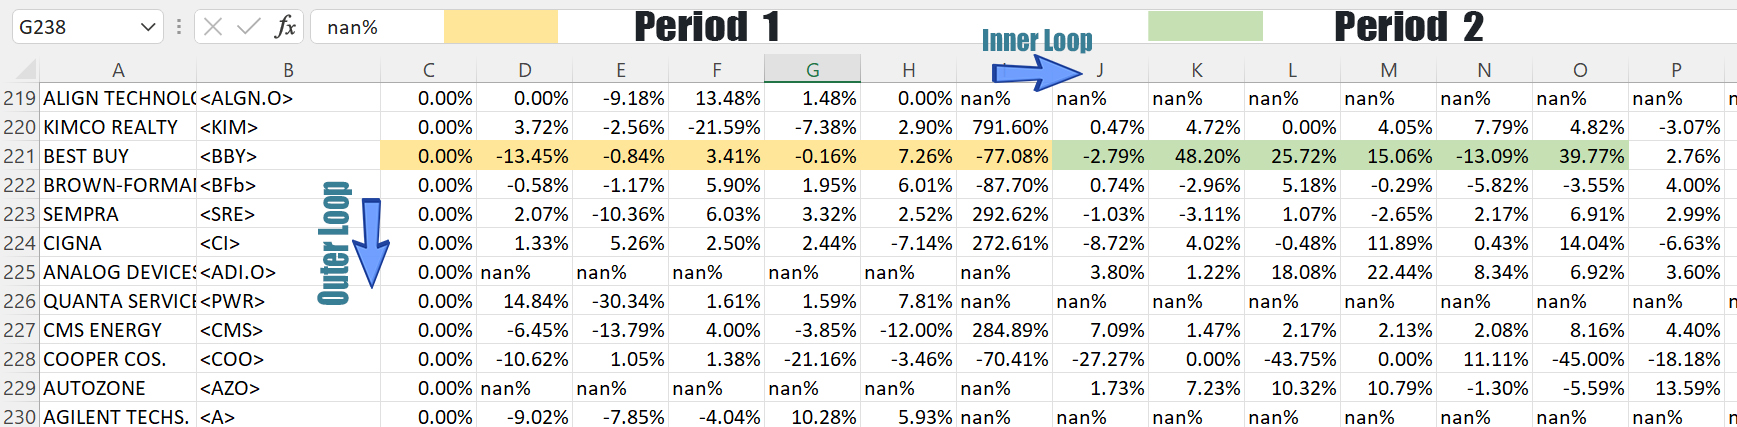

### Algorithm Implementation

In [64]:
from datetime import datetime

start_gnr_period = 3
end_gnr_period = 9

start_hdl_period = start_gnr_period + 6 
end_hdl_period = end_gnr_period + 6

index = 0

# Append all the temporary returns 
hdl_returns_list = []

## Final returns
# Final_returns = []

list_dates = []
start_dates = []
end_dates = []

rf_values_list = []
final_returns = []


while end_gnr_period < length:
    optimal_top50 = {}
    dict = {}

    rr_dict = {}
    portfolio_selection_dict = {}
    holding_returns_dict = {}

    for i in polished_list[1:]:
        
        ticker = i[1].strip("<>")
        key = ticker
        
        # Key is the  company name -> create list for each company values in the selective period 
        if key not in dict:
            dict[key] = []

        #company_ticker = i[1]
        # APPEND THE VALUES IN THE EXCEL

        for j in i[start_gnr_period:end_gnr_period]:
    
            dict[key].append(j)

        #print(dict)
        #print(dict[key])
            #print(j)

        
        # Create dictionary to compare all values over the selective time period
        if key not in holding_returns_dict:
            holding_returns_dict[key] = []

        if key not in portfolio_selection_dict:
            portfolio_selection_dict[key] = []

        ### Portfolio GENERATION Period
        
        x = 0.00

        for y in dict[key]:
            #print(dict[key[y]])
            if isinstance(y, float) and str(y) != 'nan':
                x = ((1 + x) * (1 + y)) - 1
                #print('Value Added is: ', y)
                #print('New Value of x is: ', x)
            else:
                continue
            #print(x)
        if x == 1.0:
            x = 0.0

        if len(portfolio_selection_dict[key]) == 0:
            portfolio_selection_dict[key].append(x)


        hdl_x = 0.00

        ### REAL RETURNS - HOLDING PERIOD

        if key not in rr_dict:
            rr_dict[key] = []

        for j in i[start_hdl_period:end_hdl_period+1]:
            #print(j)
            rr_dict[key].append(j)

        for y in rr_dict[key]: 
            # hdl_x denotes the real return over the holding period


            if isinstance(y, float) and str(y) != 'nan':
                hdl_x *= ((1 + hdl_x) * (y + 1)) - 1
                #print('Value Added is: ', y)
                #print('New Value of x is: ', x)
            else:
                continue

        if hdl_x == 1.0:
            hdl_x = 0.0

        if len(holding_returns_dict[key]) == 0:
            holding_returns_dict[key].append(x)

    ## Given that RF is a fixed value from zero to one -> taking the average of it
    avg_rf = 0

    if start_hdl_period <= 355: 

        for i in rf_values[start_hdl_period-1:end_hdl_period-1]:
            avg_rf += i

        avg_rf = (avg_rf/len(rf_values[start_hdl_period-1:end_hdl_period-1])) 

    ###

    final_selection = {}
    
    for k in portfolio_selection_dict:

        if start_gnr_period <= len(S_and_P):
            if k in S_and_P[start_gnr_period]:
                if k not in final_selection:
                    final_selection[k] = []
                    final_selection[k].append(portfolio_selection_dict[k])
    
        else:
            continue

    
    top_25 = {k: v for k, v in sorted(final_selection.items(), key=lambda item: item[1], reverse=True)[:25]}

    ### Performance
    ## CALCULATE THE PERFORMANCE WITH REAL DATA AND RETURN IT TO EXCEL
    ### Make the calculation basically ((Winners + Vix)/2) - Rfr
    
    rr_returns_list = []
    for k in top_25:
        #print(k)

        ## LOOK FOR EACH OF THE RETURNS IN THE NEXT PERIOD (REAL_RETURNS-PHASE)
        ## THE PERFORMANCE OF EACH STOCK, THAT ENTERED THE TOP_50 AND AVERAGE THE PERFORMANCE EQUALLY

        rr_returns_list.append(real_returns_dict[k][0])

    ## Just to consider the value of the Vix exists (there are less values in the database)
    avg_performance = (sum(rr_returns_list)/len(rr_returns_list))
    
    ## Subtract the Risk-Free Values

    avg_performance = ((avg_performance ) - avg_rf)
    
    # Call function to add dates
    add_dates(start_gnr_period, end_gnr_period)

    avg_performance = "{:.2%}".format(avg_performance)
    print('Average performance of Top 50 stocks in 6-months Period ', list_dates[index], ' is: ', avg_performance)
    #print(list_dates)
    final_returns.append(avg_performance)
    index += 1 

    ## For each key in dictionary calculate the returns
    ## Keep the top 25 
    
    ## RESTART WHILE LOOP UNTIL NO MORE DATA COLUMNS ARE THERE E.G. 2022 DATA

    start_gnr_period += 6
    end_gnr_period += 6

    start_hdl_period += 6
    end_hdl_period += 6

    
## CALCULATE THE RETURNS OF THE PORTFOLIO BASED ON THE SELECTIONS


Average performance of Top 50 stocks in 6-months Period  4/1992 to 10/1992  is:  15.11%
Average performance of Top 50 stocks in 6-months Period  10/1992 to 4/1993  is:  56.15%
Average performance of Top 50 stocks in 6-months Period  4/1993 to 10/1993  is:  45.23%
Average performance of Top 50 stocks in 6-months Period  10/1993 to 4/1994  is:  35.71%
Average performance of Top 50 stocks in 6-months Period  4/1994 to 10/1994  is:  1.78%
Average performance of Top 50 stocks in 6-months Period  10/1994 to 4/1995  is:  7.55%
Average performance of Top 50 stocks in 6-months Period  4/1995 to 10/1995  is:  46.02%
Average performance of Top 50 stocks in 6-months Period  10/1995 to 4/1996  is:  30.56%
Average performance of Top 50 stocks in 6-months Period  4/1996 to 10/1996  is:  19.09%
Average performance of Top 50 stocks in 6-months Period  10/1996 to 4/1997  is:  30.59%
Average performance of Top 50 stocks in 6-months Period  4/1997 to 10/1997  is:  22.87%
Average performance of Top 50 stoc

### SAME CODE FOR DETAILED REPRESENTATION

In [71]:
from datetime import datetime

start_gnr_period = 3
end_gnr_period = 9

start_hdl_period = start_gnr_period + 6 
end_hdl_period = end_gnr_period + 6

index = 0

# Append all the temporary returns 
hdl_returns_list = []

## Final returns
# Final_returns = []

list_dates = []
start_dates = []
end_dates = []

rf_values_list = []
final_returns = []


while end_gnr_period < length:
    optimal_top50 = {}
    dict = {}

    rr_dict = {}
    portfolio_selection_dict = {}
    holding_returns_dict = {}

    for i in polished_list[1:]:
        
        ticker = i[1].strip("<>")
        key = ticker
        
        # Key is the  company name -> create list for each company values in the selective period 
        if key not in dict:
            dict[key] = []

        #company_ticker = i[1]
        # APPEND THE VALUES IN THE EXCEL

        for j in i[start_gnr_period:end_gnr_period]:
    
            dict[key].append(j)

        #print(dict)
        #print(dict[key])
            #print(j)

        
        # Create dictionary to compare all values over the selective time period
        if key not in holding_returns_dict:
            holding_returns_dict[key] = []

        if key not in portfolio_selection_dict:
            portfolio_selection_dict[key] = []

        ### Portfolio GENERATION Period
        
        x = 0.00

        for y in dict[key]:
            #print(dict[key[y]])
            if isinstance(y, float) and str(y) != 'nan':
                x = ((1 + x) * (1 + y)) - 1
                #print('Value Added is: ', y)
                #print('New Value of x is: ', x)
            else:
                continue
            #print(x)
        if x == 1.0:
            x = 0.0

        if len(portfolio_selection_dict[key]) == 0:
            portfolio_selection_dict[key].append(x)


        hdl_x = 0.00

        ### REAL RETURNS - HOLDING PERIOD

        if key not in rr_dict:
            rr_dict[key] = []

        for j in i[start_hdl_period:end_hdl_period+1]:
            #print(j)
            rr_dict[key].append(j)

        for y in rr_dict[key]: 
            # hdl_x denotes the real return over the holding period


            if isinstance(y, float) and str(y) != 'nan':
                hdl_x *= ((1 + hdl_x) * (y + 1)) - 1
                #print('Value Added is: ', y)
                #print('New Value of x is: ', x)
            else:
                continue

        if hdl_x == 1.0:
            hdl_x = 0.0

        if len(holding_returns_dict[key]) == 0:
            holding_returns_dict[key].append(x)

    ## Given that RF is a fixed value from zero to one -> taking the average of it
    avg_rf = 0

    if start_hdl_period <= 355: 

        for i in rf_values[start_hdl_period-1:end_hdl_period-1]:
            avg_rf += i

        avg_rf = (avg_rf/len(rf_values[start_hdl_period-1:end_hdl_period-1])) 

    ###

    final_selection = {}
    
    for k in portfolio_selection_dict:

        if start_gnr_period <= len(S_and_P):
            if k in S_and_P[start_gnr_period]:
                if k not in final_selection:
                    final_selection[k] = []
                    final_selection[k].append(portfolio_selection_dict[k])
    
        else:
            continue

    
    top_25 = {k: v for k, v in sorted(final_selection.items(), key=lambda item: item[1], reverse=True)[:25]}

    ### Performance
    ## CALCULATE THE PERFORMANCE WITH REAL DATA AND RETURN IT TO EXCEL
    ### Make the calculation basically ((Winners + Vix)/2) - Rfr
    
    holding_returns_list = []
    for k in top_25:
        #print(k)

        ## LOOK FOR EACH OF THE RETURNS IN THE NEXT PERIOD (REAL_RETURNS-PHASE)
        ## THE PERFORMANCE OF EACH STOCK, THAT ENTERED THE TOP_50 AND AVERAGE THE PERFORMANCE EQUALLY

        holding_returns_list.append(holding_returns_dict[k][0])

    print('TOP STOCKS IN THE PERIOD ARE')
    ## Just to consider the value of the Vix exists (there are less values in the database)
    avg_performance = (sum(holding_returns_list)/len(holding_returns_list))
    
    ## Subtract the Risk-Free Values

    avg_performance = ((avg_performance ) - avg_rf)
    
    # Call function to add dates
    add_dates(start_gnr_period, end_gnr_period)
    print('HOW TOP STOCKS IN THE PERIOD ', list_dates[index], ' PERFORMED IN THE HOLDING PERIOD ', top_25)

    avg_performance = "{:.2%}".format(avg_performance)
    print('Average performance of Top 50 stocks in 6-months Period ', list_dates[index], ' is: ', avg_performance)
    #print(list_dates)
    final_returns.append(avg_performance)
    index += 1 

    ## For each key in dictionary calculate the returns
    ## Keep the top 25 
    
    ## RESTART WHILE LOOP UNTIL NO MORE DATA COLUMNS ARE THERE E.G. 2022 DATA

    start_gnr_period += 6
    end_gnr_period += 6

    start_hdl_period += 6
    end_hdl_period += 6

    
## CALCULATE THE RETURNS OF THE PORTFOLIO BASED ON THE SELECTIONS


TOP STOCKS IN THE PERIOD ARE
HOW TOP STOCKS IN THE PERIOD  4/1992 to 10/1992  PERFORMED IN THE HOLDING PERIOD  {'CERN.OQ': [[1.225865058896506]], 'DVN.N': [[0.7777127687723155]], 'MNST.OQ': [[0.5983803138555579]], 'AOS.N': [[0.5900540613606262]], 'EOG.N': [[0.5846250326850755]], 'ADSK.OQ': [[0.5692602449568271]], 'PBCT.OQ': [[0.5482692066227568]], 'MGM.N': [[0.3935364389181275]], 'LEN.N': [[0.36949242931654114]], 'STE.N': [[0.32808247999999995]], 'GD.N': [[0.3263618719833383]], 'APA.OQ': [[0.32429887596889895]], 'GL.N': [[0.32270581101749585]], 'PGR.N': [[0.3183991712947014]], 'VTRS.OQ': [[0.3074323813044302]], 'TFC.N': [[0.2869902290963928]], 'EA.OQ': [[0.24717955601553787]], 'WST.N': [[0.22865258727573567]], 'LOW.N': [[0.22492201776132137]], 'F.N': [[0.22184101124565414]], 'HAL.N': [[0.21107530398527974]], 'MTB.N': [[0.2091193234111599]], 'ZION.OQ': [[0.20731106926815457]], 'LUV.N': [[0.20575368601033084]], 'TJX.N': [[0.19264029333275468]]}
Average performance of Top 50 stocks in 6-m

In [72]:
print('Total Portfolio Generation periods considered ', len(start_dates))

Total Portfolio Generation periods considered  59


In [73]:
triple_exports = pd.DataFrame(data=[start_dates, end_dates, final_returns],).T

In [74]:
pd.DataFrame(triple_exports).to_csv('C:/Users/noah_/Documents/Programming/exports_portfolio.csv', index=False)